Data set link : https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data

A retrospective sample of males in a heart-disease high-risk region 
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 


sbp		systolic blood pressure

tobacco		cumulative tobacco (kg)

ldl		low densiity lipoprotein cholesterol

adiposity

famhist		family history of heart disease (Present, Absent)

typea		type-A behavior


obesity

alcohol		current alcohol consumption

age		age at onset

chd		response, coronary heart disease

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [88]:
os.chdir("c:\\ml_using_python\\Data")
heart_data_dlf = pd.read_csv("SAheart.data")

In [89]:
heart_data_dlf.sample(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
192,193,102,0.40,3.41,17.22,Present,56,23.59,2.06,39,1
358,360,132,4.05,5.15,26.51,Present,31,26.67,16.30,50,0
427,429,146,1.16,2.28,34.53,Absent,50,28.71,45.00,49,0
258,259,138,12.00,5.13,28.34,Absent,59,24.49,32.81,58,1
201,202,136,3.15,4.37,20.22,Present,59,25.12,47.16,31,1
445,447,136,2.80,2.53,9.28,Present,61,20.70,4.55,25,0
142,143,128,2.80,5.53,14.29,Absent,64,24.97,0.51,38,0
399,401,126,0.00,3.57,26.01,Absent,61,26.30,7.97,47,0
157,158,174,9.45,5.13,35.54,Absent,55,30.71,59.79,53,0
107,108,170,7.60,5.50,37.83,Present,42,37.41,6.17,54,1


# 1. How many records are present in the data set and also print the metadata information

In [90]:
print("no of records present  =", heart_data_dlf.shape[0])

no of records present  = 462


In [91]:
heart_data_dlf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


# 2. Draw a bar plot to show the number of persons having chd or not in comparison to they having family historyof the diesease or not?

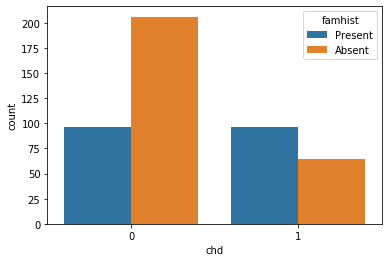

In [92]:
sns.countplot(heart_data_dlf['chd'], hue =heart_data_dlf['famhist'] )

# 3. Does age have any correlation with sbp? choose appropriate graph to show correlation

In [93]:
corr_matrix = heart_data_dlf.corr()

In [94]:
corr_matrix['sbp']

row.names    0.171583
sbp          1.000000
tobacco      0.212247
ldl          0.158296
adiposity    0.356500
typea       -0.057454
obesity      0.238067
alcohol      0.140096
age          0.388771
chd          0.192354
Name: sbp, dtype: float64

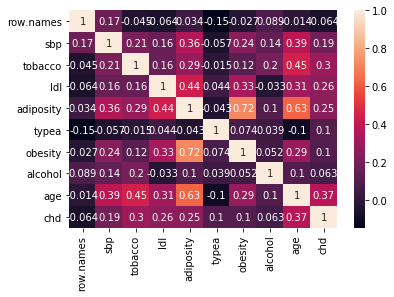

In [95]:
sns.heatmap(corr_matrix, annot=True)

__sbp and age have +ve correlation with a value of 0.39__

# 4. Compare the distribution of tobacco  consumptions for persons having CHD and not having CHD? can you interpret the effect of tobacco vs chd coronary heart disease

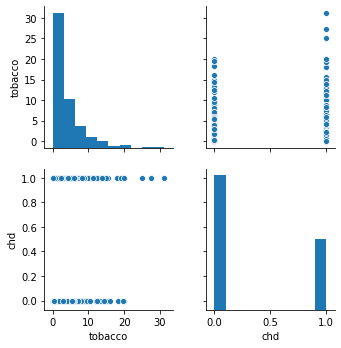

In [96]:
dist_cols = ['tobacco','chd']
sns.pairplot(heart_data_dlf[dist_cols])

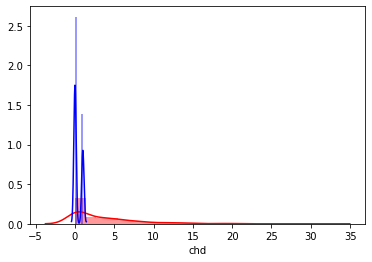

In [98]:
sns.distplot(heart_data_dlf.tobacco,color='Red')
sns.distplot(heart_data_dlf.chd,color='blue')

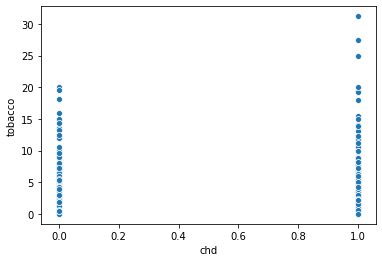

In [99]:
sns.scatterplot(x='chd',y='tobacco',data=heart_data_dlf)

# 5. How are the parameters sbp,obesity,age and Idl are correlated?use appropriate graphs

In [100]:
cor_colums= ['ldl','obesity','age','sbp']

corr_matrix = heart_data_dlf[cor_colums].corr()

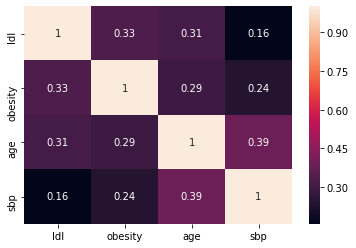

In [101]:
sns.heatmap(corr_matrix, annot=True)

# 6 Derive the new column called agegroup from age column
0-15 young
15-35 adults
35-55 mid
55-   old

In [105]:
def catergorise(age):
    if(age<=15):
        return "young"
    elif(age>16 and age<=35):
        return "adult"
    elif(age>36 and age<=55):
        return "mid"
    elif(age>55):
        return "old"


In [106]:
heart_data_dlf['age_group'] = heart_data_dlf['age'].apply(lambda rec: (catergorise(rec)))

In [109]:
heart_data_dlf.sample(10)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,age_group
167,168,160,1.52,8.12,29.30,Present,54,25.87,12.86,43,1,mid
179,180,108,15.00,4.91,34.65,Absent,41,27.96,14.40,56,0,old
11,12,134,14.10,4.44,22.39,Present,65,23.09,0.00,40,1,mid
427,429,146,1.16,2.28,34.53,Absent,50,28.71,45.00,49,0,mid
216,217,180,0.52,4.23,16.38,Absent,55,22.56,14.77,45,1,mid
136,137,116,2.70,3.69,13.52,Absent,55,21.13,18.51,32,0,adult
308,310,142,2.40,2.55,23.89,Absent,54,26.09,59.14,37,0,mid
55,56,152,5.99,7.99,32.48,Absent,45,26.57,100.32,48,0,mid
361,363,124,0.40,3.67,25.76,Absent,43,28.08,20.57,34,0,adult
100,101,136,8.00,7.85,23.81,Present,51,22.69,2.78,50,0,mid


In [122]:
heart_data_dlf[heart_data_dlf['age_group']=='young']

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,age_group
13,14,132,0.0,1.87,17.21,Absent,49,23.63,0.97,15,0,young
42,43,120,0.0,1.07,16.02,Absent,47,22.15,0.00,15,0,young
70,71,118,0.0,3.67,12.13,Absent,51,19.15,0.60,15,0,young


# 7. Find the number of CHD cases under different age_groups

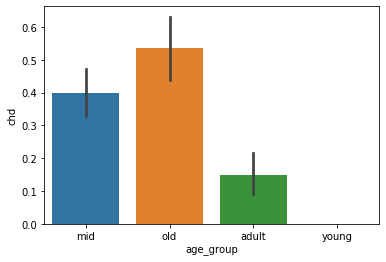

In [110]:
sns.barplot(x='age_group',y='chd',data=heart_data_dlf)

In [118]:
heart_data_dlf.groupby('age_group')['chd'].value_counts()

age_group  chd
adult      0      103
           1       18
mid        0      121
           1       80
old        1       61
           0       53
young      0        3
Name: chd, dtype: int64

# 8.Draw boxplot to compare distributions of ldl across age groups

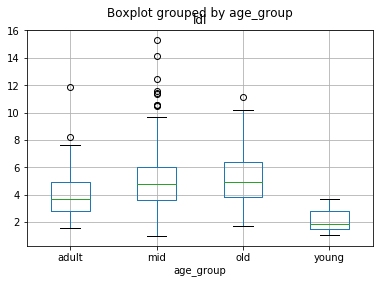

In [123]:
heart_data_dlf.boxplot(column='ldl',by='age_group')

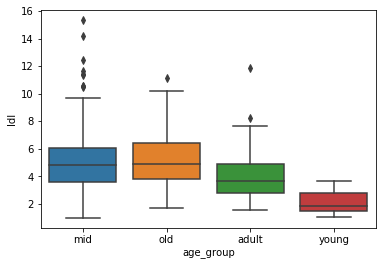

In [132]:
sns.boxplot(x='age_group',y='ldl',data=heart_data_dlf)